In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
import os

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
ct = "LiangSteinNeuron"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")

d_bin_g1_all = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g1_all[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g1_all[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g1_all[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "preGC_IIaFemale"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group2_SpecSup0_" + ct + ".txt.gz", sep = "\t")

d_bin_g2_all = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g2_all[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g2_all[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g2_all[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "LiangSteinNeuron"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopCT_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")
      
d_bin_g1_remTop = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g1_remTop[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g1_remTop[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g1_remTop[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "preGC_IIaFemale"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopCT_Tau_Group2_SpecSup0_" + ct + ".txt.gz", sep = "\t")

d_bin_g2_remTop = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g2_remTop[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g2_remTop[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g2_remTop[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "LiangSteinNeuron"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopTwoCT_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")
      
d_bin_g1_remTop2 = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g1_remTop2[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g1_remTop2[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g1_remTop2[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "preGC_IIaFemale"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopTwoCT_Tau_Group2_SpecSup0_" + ct + ".txt.gz", sep = "\t")

d_bin_g2_remTop2 = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g2_remTop2[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g2_remTop2[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g2_remTop2[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "LiangSteinNeuron"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")        

d_bin_g1_remTop3 = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g1_remTop3[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g1_remTop3[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g1_remTop3[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))

ct = "preGC_IIaFemale"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group2_SpecSup0_" + ct + ".txt.gz", sep = "\t")

d_bin_g2_remTop3 = {}
for i in np.unique(v["CTS_Cutoff"]):
    if "< " in i:
        d_bin_g2_remTop3[i] = "< " + str(np.round(float(i.replace("< ", "")), 3))
    elif "-" in i:
        d_bin_g2_remTop3[i] = str(np.round(float(i.split("-")[0]), 3)) + "-" + str(np.round(float(i.split("-")[1]), 3))
    elif "> " in i:
        d_bin_g2_remTop3[i] = "> " + str(np.round(float(i.replace("> ", "")), 3))


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\1717826299.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_29960\1717826299.py:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group2_SpecSup0_" + ct + ".txt.gz", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_29960\1717826299.py:26: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_RemTopCT_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_29960\1717826299.py:38: DtypeWarning: Columns (2) have mixed ty

C:\Users\astar\AppData\Local\Temp\ipykernel_21448\2549042344.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21448\2549042344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = v2, y = "alpha", x = "Tau bin", palette = "rocket")


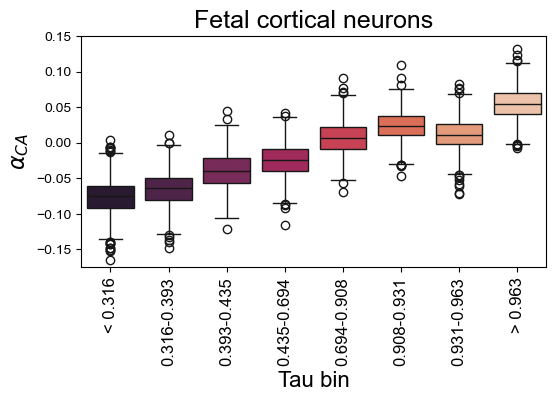

In [147]:
ct = "LiangSteinNeuron"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")

cutoff = 0.6
v2 = v[v["Proportion"] == cutoff]
v2 = v2[v2["EffectOrTotal"] == "Mean_CTS_Effect"]
v2 = v2[v2["Metric"] == "Absolute log fold-change"]
v2 = v2[v2["Top_20th"] == "All"]
new = []
for index, row in v2.iterrows():
    new.append(d_bin_g1_all[row["CTS_Cutoff"]])
v2["Tau bin"] = new
fig, ax = plt.subplots(figsize = (6, 3))

sns.boxplot(data = v2, y = "alpha", x = "Tau bin", palette = "rocket")
plt.ylim(-0.175, 0.15)
plt.ylabel("$\\alpha_{CA}$", size = 16)
plt.xticks(rotation = 90, size = 12)
plt.xlabel("Tau bin", size = 16)
plt.title("Fetal cortical neurons", size = 18)
plt.show()

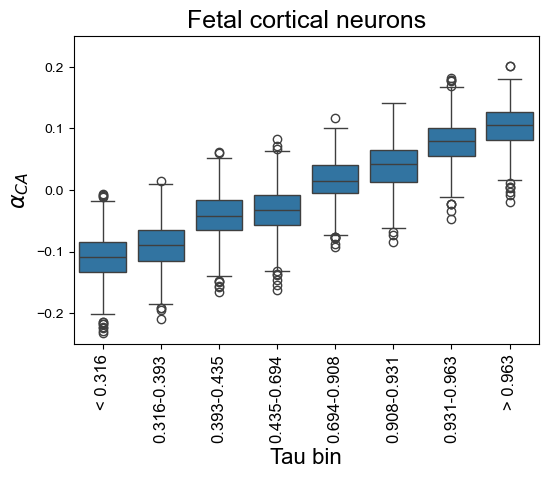

In [121]:
v2["Tau bin"] = new
fig, ax = plt.subplots(figsize = (6, 4))

sns.boxplot(data = v2, y = "alpha", x = "Tau bin", palette = "rocket")
plt.ylim(-0.25, 0.25)
plt.ylabel("$\\alpha_{CA}$", size = 16)
plt.xticks(rotation = 90, size = 12)
plt.xlabel("Tau bin", size = 16)
plt.title("Fetal cortical neurons", size = 18)
plt.show()

C:\Users\astar\AppData\Local\Temp\ipykernel_21448\3282732592.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")


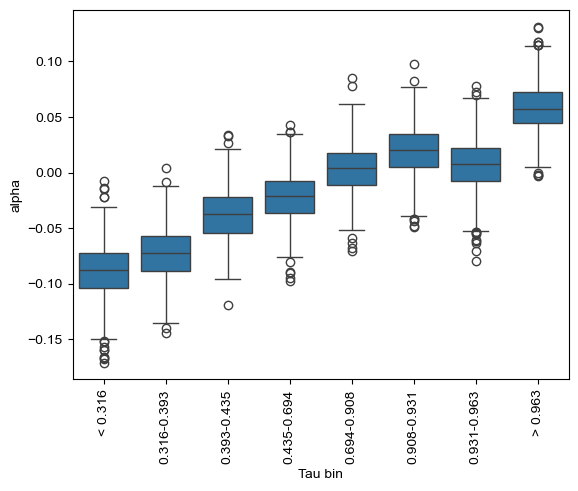

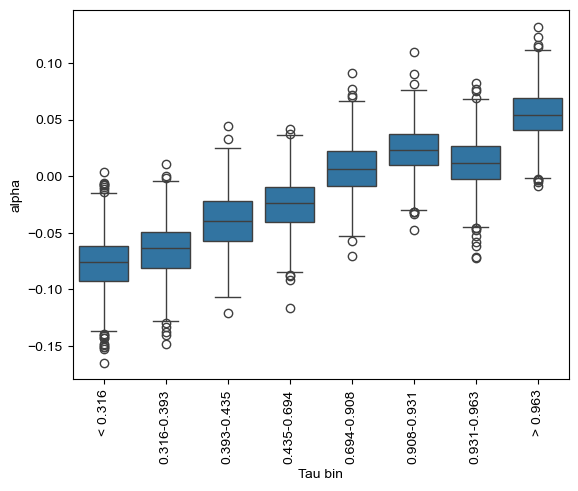

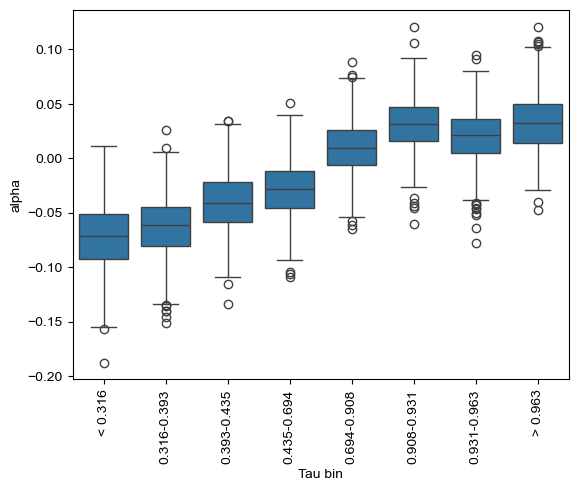

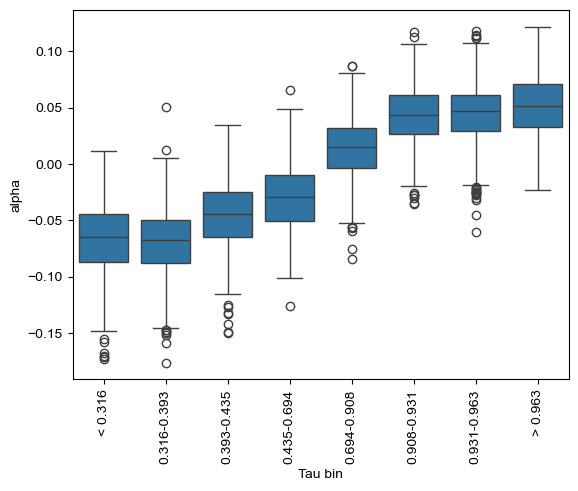

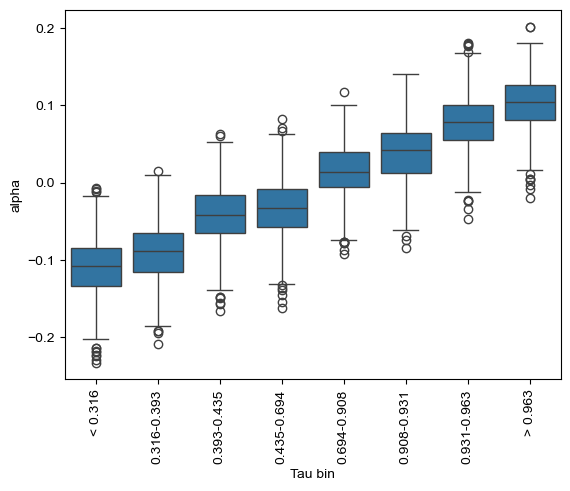

In [117]:
ct = "LiangSteinNeuron"
v = pd.read_csv("StratifyCTS_Results/" + ct + "/StratifyCTS_FilterNewTEs_Tau_Group1_SpecSup0_" + ct + ".txt.gz", sep = "\t")

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    v2 = v[v["Proportion"] == cutoff]
    v2 = v2[v2["EffectOrTotal"] == "Mean_CTS_Effect"]
    v2 = v2[v2["Metric"] == "Absolute log fold-change"]
    v2 = v2[v2["Top_20th"] == "All"]
    new = []
    for index, row in v2.iterrows():
        new.append(d_bin_g1_all[row["CTS_Cutoff"]])
    v2["Tau bin"] = new
    sns.boxplot(data = v2, y = "alpha", x = "Tau bin", palette = "rocket")
    plt.xticks(rotation = 90)
    plt.show()
    


In [3]:
def convert_cutoff(x):
    x = list(np.unique(x))
    x = [i.replace(" ", "").replace("<", "").replace(">", "").replace("=", "") for i in x]
    x_new = []
    for i in x:
        if "-" in i:
            x_new.append(float(i.split("-")[0]))
        else:
            x_new.append(float(i))
    x_new.sort()
    new = []
    c = 0
    for i in x_new:
        c+=1
        new.append(c)
    return x_new, new


In [17]:
x = "refSequence     refPosition     Orcinus_orca    Sorex_araneus   Uropsilus_gracilis      Crocidura_indochinensis Erinaceus_europaeus     Scalopus_aquaticus"
x.split() + [x.split()[-2]]

['refSequence',
 'refPosition',
 'Orcinus_orca',
 'Sorex_araneus',
 'Uropsilus_gracilis',
 'Crocidura_indochinensis',
 'Erinaceus_europaeus',
 'Scalopus_aquaticus',
 'Erinaceus_europaeus']

In [15]:
group1 = ["KosoyRoussosControlMicroglia", "LiangSteinNeuron", "AdultHeartVentricularCardiomyocyte", "AdultProximalTubule", "FetalArterialECs", "FetalChondrocytes", "SertoliMale", "ASCT"]
group2 = ["FetalGonadImmuneFemale", "ITL23", "AdultHeartSmoothMuscle", "AdultLoopOfHenle", "FetalHeartPericytes", "FetalHeartCardiacFibroblasts", "preGC_IIaFemale", "FetalBrainCOP"]

df = pd.DataFrame()

cutoff = 0.6
for folder in os.listdir("StratifyCTS_Results"):
    print(folder)

    if folder in group1:
        vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")
    #elif folder in group2:
    #    vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group2_SpecSup0_" + folder + ".txt.gz", sep = "\t")
    
        v2r = vr[vr["Proportion"] == cutoff]
        v2r = v2r[v2r["EffectOrTotal"] == "Mean_CTS_Effect"]
        v2r = v2r[v2r["Metric"] == "Absolute log fold-change"]
        v2r = v2r[v2r["Top_20th"] == "All"]
        v2r["CutNum"] = v2r["CutNum"].astype(str)
        v2r["CTS_Rank"] = np.repeat(convert_cutoff(v2r["CTS_Cutoff"])[1], v2r.shape[0]/8)
        #v2r = v2r[v2r["CutNum"].isin(["50000", "Rest"])]
        v2r["Cell type"] = np.repeat(d_abrev[folder], v2r.shape[0])
        v2r
        df = pd.concat([df, v2r])
df

AdultHeartSmoothMuscle
AdultHeartVentricularCardiomyocyte


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


AdultLoopOfHenle
AdultProximalTubule


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


ASCT


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


FetalArterialECs


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


FetalBrainCOP
FetalChondrocytes


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


FetalGonadImmuneFemale
FetalHeartCardiacFibroblasts
FetalHeartPericytes
ITL23
KosoyRoussosControlMicroglia


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


LiangSteinNeuron


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


preGC_IIaFemale
SertoliMale


C:\Users\astar\AppData\Local\Temp\ipykernel_29960\2343222632.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifyCTS_Results/" + folder + "/StratifyCTS_FilterNewTEs_RemTopThreeCT_Tau_Group1_SpecSup0_" + folder + ".txt.gz", sep = "\t")


,CTS_Cutoff,Metric,CutNum,Median fixed accessibility,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic accessibility,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,...,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,EffectOrTotal,CTS_Rank,Cell type
144149,< 0.1969324447224172,Absolute log fold-change,50000,72.739710,0.041117,38905,71.516065,0.041786,11095,0.306152,...,0.048312,"[[15350, 23555], [4437, 6658]]","[[15350, 23555], [4438, 6657]]",0.6,All,Real,Real,Mean_CTS_Effect,1,AH cardiomyo.
144167,< 0.1969324447224172,Absolute log fold-change,50000,72.632960,0.041268,38905,70.514913,0.042134,10503,0.087058,...,0.048783,"[[15204, 23701], [4201, 6302]]","[[15204, 23701], [4202, 6301]]",0.6,All,0,Bootstrap,Mean_CTS_Effect,1,AH cardiomyo.
144185,< 0.1969324447224172,Absolute log fold-change,50000,72.764155,0.040971,38905,71.344302,0.042040,10503,0.536724,...,0.048236,"[[15431, 23474], [4200, 6303]]","[[15431, 23474], [4202, 6301]]",0.6,All,1,Bootstrap,Mean_CTS_Effect,1,AH cardiomyo.
144203,< 0.1969324447224172,Absolute log fold-change,50000,72.543340,0.041229,38905,71.485265,0.042048,10503,0.163008,...,0.048565,"[[15271, 23634], [4201, 6302]]","[[15271, 23634], [4202, 6301]]",0.6,All,2,Bootstrap,Mean_CTS_Effect,1,AH cardiomyo.
144221,< 0.1969324447224172,Absolute log fold-change,50000,72.797485,0.041111,38905,71.135155,0.042134,10503,0.244472,...,0.048420,"[[15316, 23589], [4200, 6303]]","[[15316, 23589], [4202, 6301]]",0.6,All,3,Bootstrap,Mean_CTS_Effect,1,AH cardiomyo.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288203,> 0.968776940380668,Absolute log fold-change,50000,73.694555,0.009161,38905,75.553412,0.009815,10503,0.263560,...,0.013569,"[[15330, 23575], [4200, 6303]]","[[15330, 23575], [4204, 6299]]",0.6,All,995,Bootstrap,Mean_CTS_Effect,8,FG sertoli
288221,> 0.968776940380668,Absolute log fold-change,50000,74.129235,0.009327,38905,74.239857,0.009307,10503,0.251037,...,0.013114,"[[15807, 23098], [4201, 6302]]","[[15807, 23098], [4203, 6300]]",0.6,All,996,Bootstrap,Mean_CTS_Effect,8,FG sertoli
288239,> 0.968776940380668,Absolute log fold-change,50000,73.347320,0.009455,38905,76.111885,0.009232,10503,0.033625,...,0.013002,"[[16011, 22894], [4201, 6302]]","[[16011, 22894], [4202, 6301]]",0.6,All,997,Bootstrap,Mean_CTS_Effect,8,FG sertoli
288257,> 0.968776940380668,Absolute log fold-change,50000,73.719670,0.009383,38905,76.136530,0.009507,10503,0.402479,...,0.013601,"[[15389, 23516], [4201, 6302]]","[[15389, 23516], [4203, 6300]]",0.6,All,998,Bootstrap,Mean_CTS_Effect,8,FG sertoli


,CellType,Bin,Lower95,Upper95
15,AC microglia,8,0.025494,0.102980
14,AC microglia,7,-0.007164,0.079914
36,F chond.,5,-0.014597,0.070748
12,AC microglia,5,-0.018748,0.067501
55,FG sertoli,8,-0.019920,0.067600
...,...,...,...,...
59,FH endoth.,4,-0.089738,0.002020
25,AK prox. tub.,2,-0.090452,0.003835
56,FH endoth.,1,-0.093911,-0.016216
57,FH endoth.,2,-0.105700,-0.017872


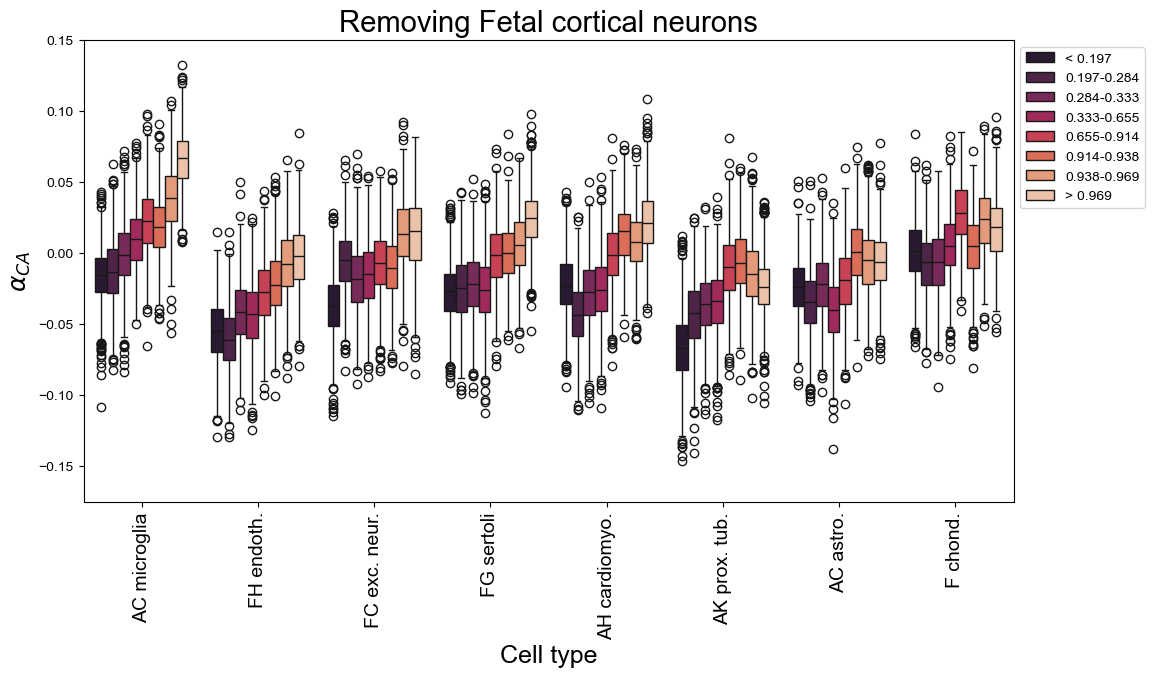

In [16]:
new = []
for index, row in df.iterrows():
    new.append(d_bin_g1_remTop3[row["CTS_Cutoff"]])
#df["Tau bin"] = df["CTS_Cutoff"]
df["Tau bin"] = new

medians = []
ci = []
palette = {}
for ct in np.unique(df["Cell type"]):
    for binn in np.unique(df["CTS_Rank"]):
        dff = df[(df["Cell type"].isin([ct])) & (df["CTS_Rank"].isin([binn]))]
        dff = dff.sort_values("alpha")
        ci.append([ct, binn, list(dff["alpha"])[25], list(dff["alpha"])[975]])
        if binn == 8:
            medians.append([ct, binn, np.median(dff["alpha"]) - save_bin])
        if binn == 1:
            save_bin = np.median(dff["alpha"])
    
df_med = pd.DataFrame(medians).sort_values(2, ascending = False)
order = list(df_med[0])

df_ci = pd.DataFrame(ci)
df_ci.columns = ["CellType", "Bin", "Lower95", "Upper95"]
df_ci = df_ci.sort_values("Lower95", ascending = False)

#for index, row in df_ci.iterrows():
#    if row["Lower95"] > 0:
#        palette[row["CellType"]] = "#F42FF5"
#    else:
#        palette[row["CellType"]] = "#40A94D"

fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, hue = "Tau bin", palette = "rocket")
plt.ylim(-0.175, 0.15)
plt.ylabel("$\\alpha_{CA}$", size = 18)
plt.xticks(rotation = 90, size = 14)
plt.xlabel("Cell type", size = 18)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("Removing Fetal cortical neurons", size = 21)

df_ci

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,CellType,Bin,Lower95,Upper95
19,AK loop of henle,4,-0.105229,0.040795
11,AH smooth musc.,4,-0.105229,0.040795
27,FB COP,4,-0.105229,0.040795
3,AC L2-3 IT neur.,4,-0.105229,0.040795
43,FG preGC IIa,4,-0.105229,0.040795
...,...,...,...,...
40,FG preGC IIa,1,-0.152407,0.018840
24,FB COP,1,-0.152407,0.018840
16,AK loop of henle,1,-0.152407,0.018840
8,AH smooth musc.,1,-0.152407,0.018840


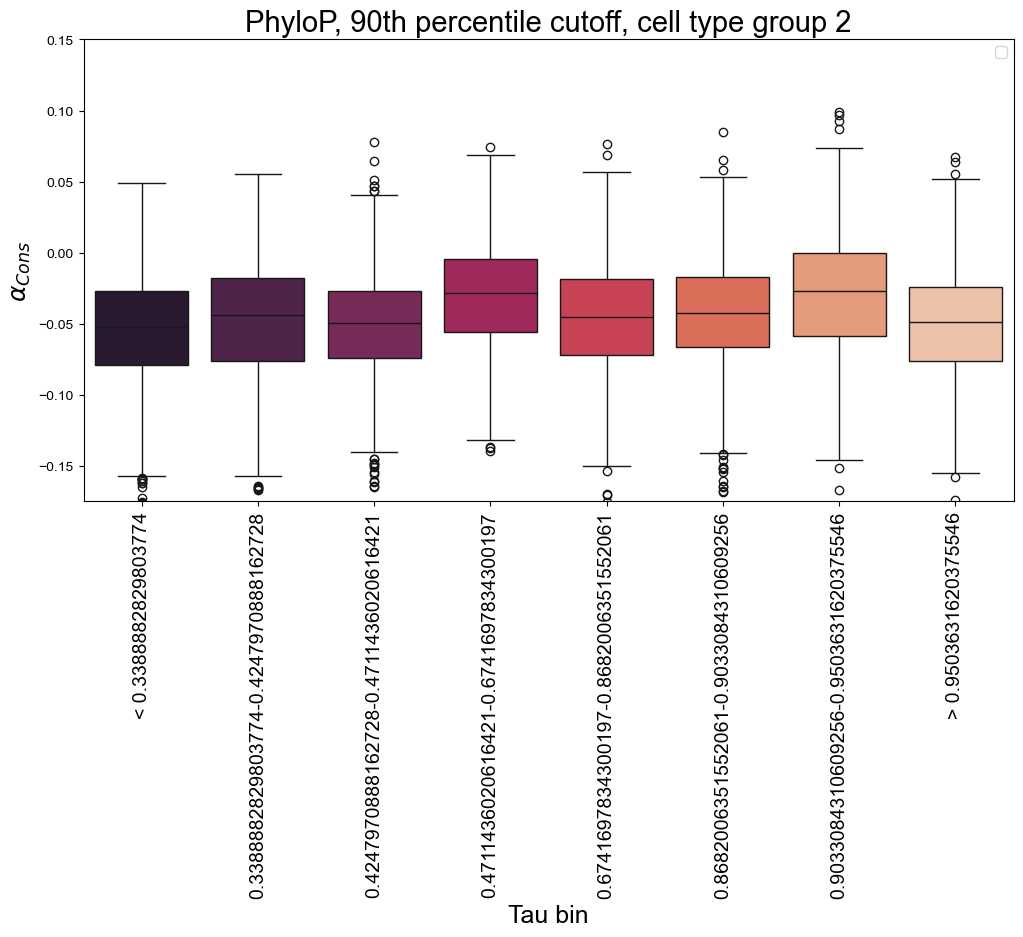

In [39]:
#For PhyloP
#df = df[df["Cell type"] == "AC astro."]
df = df[df["Cell type"] == "FH peri."]
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(data = df, y = "alpha", x = "Tau bin", hue = "Tau bin", palette = "rocket")
plt.ylim(-0.175, 0.15)
plt.ylabel("$\\alpha_{Cons}$", size = 18)
plt.xticks(rotation = 90, size = 14)
plt.xlabel("Tau bin", size = 18)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("PhyloP, 90th percentile cutoff, cell type group 2", size = 21)

df_ci

In [5]:
v2

,LFC_Cutoff,Metric,CutNum,Median fixed metric,Number fixed variants,Median polymorphic metric,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling
5,< 0.1034199,Mean_CTS_Effect,50000,0.691164,9246599,0.690437,2552024,1.397804e-07,4.427343e-14,7.003669e-08,2.213671e-14,0.007570,0.726911,"[[3715514, 5531085], [1020809, 1531215]]","[[3715514, 5531085], [1020810, 1531214]]",0.6,All,Real,Real
14,< 0.1034199,Mean_CTS_Effect,50000,0.687144,1750188,0.686710,480716,6.666618e-02,1.011247e-01,3.340726e-02,5.056233e-02,0.006078,0.722533,"[[702638, 1047550], [192286, 288430]]","[[702638, 1047550], [192287, 288429]]",0.6,Top20th,Real,Real
23,< 0.1034199,Mean_CTS_Effect,50000,0.690407,39386,0.690631,10614,4.372647e-01,5.727544e-01,7.865373e-01,7.136231e-01,-0.017643,0.728343,"[[15589, 23797], [4245, 6369]]","[[15589, 23797], [4246, 6368]]",0.6,All,0,Bootstrap
32,< 0.1034199,Mean_CTS_Effect,50000,0.685725,28877,0.686802,7748,5.651692e-01,7.198663e-01,7.236536e-01,6.400673e-01,-0.015277,0.723972,"[[11447, 17430], [3099, 4649]]","[[11447, 17430], [3100, 4648]]",0.6,Top20th,0,Bootstrap
41,< 0.1034199,Mean_CTS_Effect,50000,0.689082,39386,0.692267,10614,5.879166e-01,1.797163e-01,7.112685e-01,9.101420e-01,-0.012259,0.726875,"[[15639, 23747], [4245, 6369]]","[[15639, 23747], [4246, 6368]]",0.6,All,1,Bootstrap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90050,> 0.4786203,Mean_CTS_Effect,Rest,0.827702,28877,0.820752,7748,2.625356e-02,2.174438e-03,1.329945e-02,1.087219e-03,0.056483,0.860091,"[[11959, 16918], [3099, 4649]]","[[11959, 16918], [3101, 4647]]",0.6,Top20th,997,Bootstrap
90059,> 0.4786203,Mean_CTS_Effect,Rest,0.834292,39386,0.829735,10614,2.541760e-02,1.744089e-03,1.293758e-02,8.720447e-04,0.048678,0.868722,"[[16228, 23158], [4245, 6369]]","[[16228, 23158], [4246, 6368]]",0.6,All,998,Bootstrap
90068,> 0.4786203,Mean_CTS_Effect,Rest,0.825846,28877,0.821059,7748,1.332124e-02,7.573639e-03,6.865126e-03,3.786819e-03,0.062520,0.859788,"[[12004, 16873], [3099, 4649]]","[[12004, 16873], [3101, 4647]]",0.6,Top20th,998,Bootstrap
90077,> 0.4786203,Mean_CTS_Effect,Rest,0.833409,39386,0.829673,10614,2.924549e-01,1.668237e-02,1.463425e-01,8.341184e-03,0.023451,0.869372,"[[15977, 23409], [4244, 6370]]","[[15977, 23409], [4246, 6368]]",0.6,All,999,Bootstrap


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\742431038.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("UseCTS_Results/" + ct + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + ct + ".txt.gz", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_14720\742431038.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = v2, y = "alpha", x = "LFC_Cutoff", palette = "rocket")


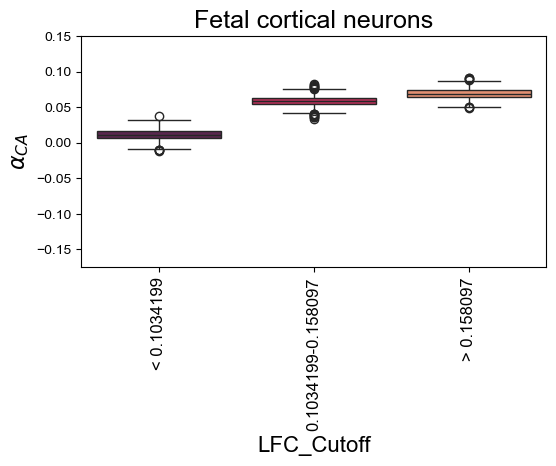

In [27]:
ct = "LiangSteinNeuron"
v = pd.read_csv("UseCTS_Results/" + ct + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + ct + ".txt.gz", sep = "\t")

cutoff = 0.3
v2 = v[v["Proportion"] == cutoff]
v2 = v2[v2["Metric"] == "Mean_CTS_Effect"]
v2 = v2[v2["Top_20th"] == "All"]

fig, ax = plt.subplots(figsize = (6, 3))

sns.boxplot(data = v2, y = "alpha", x = "LFC_Cutoff", palette = "rocket")
plt.ylim(-0.175, 0.15)
plt.ylabel("$\\alpha_{CA}$", size = 16)
plt.xticks(rotation = 90, size = 12)
plt.xlabel("LFC_Cutoff", size = 16)
plt.title("Fetal cortical neurons", size = 18)
plt.show()

In [53]:
group1 = ["KosoyRoussosControlMicroglia", "LiangSteinNeuron", "AdultHeartVentricularCardiomyocyte", "AdultProximalTubule", "FetalArterialECs", "FetalChondrocytes", "SertoliMale", "ASCT"]
group2 = ["FetalGonadImmuneFemale", "ITL23", "AdultHeartSmoothMuscle", "AdultLoopOfHenle", "FetalHeartPericytes", "FetalHeartCardiacFibroblasts", "preGC_IIaFemale", "FetalBrainCOP"]

df = pd.DataFrame()

cutoff = 0.3
for folder in os.listdir("UseCTS_Results"):
    print(folder)

    if folder in group1:
        vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")
    #elif folder in group2:
    #    vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup250_abs_logfc_" + folder + ".txt.gz", sep = "\t")
    
        v2r = vr[vr["Proportion"] == cutoff]
        v2r = v2r[v2r["Metric"] == "Mean_CTS_Effect"]
        v2r = v2r[v2r["Top_20th"] == "Top20th"]
        
        keep = ""
        for i in np.unique(v2r["LFC_Cutoff"]):
            if "> " in i:
                keep = i
        v2r = v2r[v2r["LFC_Cutoff"] == keep]
        v2r["Cell type"] = np.repeat(d_abrev[folder], v2r.shape[0])
        df = pd.concat([df, v2r])
df

AdultHeartSmoothMuscle
AdultHeartVentricularCardiomyocyte


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


AdultLoopOfHenle
AdultProximalTubule


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


ASCT


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


FetalArterialECs


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


FetalBrainCOP
FetalChondrocytes


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


FetalGonadImmuneFemale
FetalHeartCardiacFibroblasts
FetalHeartPericytes
ITL23
KosoyRoussosControlMicroglia


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


LiangSteinNeuron


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


preGC_IIaFemale
SertoliMale


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\2838682154.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("UseCTS_Results/" + folder + "/UseCTS_FilterNewTEs_Tau_Group1_SpecSup0_abs_logfc_" + folder + ".txt.gz", sep = "\t")


,LFC_Cutoff,Metric,CutNum,Median fixed metric,Number fixed variants,Median polymorphic metric,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,Cell type
36047,> 0.17092445,Mean_CTS_Effect,Rest,0.752171,186445,0.749428,51014,1.052701e-03,0.000266,5.312934e-04,0.000133,0.035217,0.664594,"[[131904, 54541], [35709, 15305]]","[[131904, 54541], [35710, 15304]]",0.3,Top20th,Real,Real,AH cardiomyo.
36065,> 0.17092445,Mean_CTS_Effect,Rest,0.752632,127948,0.749779,35287,9.014906e-07,0.000759,4.598244e-07,0.000379,0.062774,0.662975,"[[91283, 36665], [24700, 10587]]","[[91283, 36665], [24702, 10585]]",0.3,Top20th,0,Bootstrap,AH cardiomyo.
36083,> 0.17092445,Mean_CTS_Effect,Rest,0.752647,127948,0.751840,35287,3.733515e-02,0.105094,1.892106e-02,0.052547,0.027016,0.666508,"[[90294, 37654], [24700, 10587]]","[[90294, 37654], [24701, 10586]]",0.3,Top20th,1,Bootstrap,AH cardiomyo.
36101,> 0.17092445,Mean_CTS_Effect,Rest,0.753254,127948,0.748453,35287,1.530837e-04,0.000064,7.748452e-05,0.000032,0.048696,0.663644,"[[90890, 37058], [24700, 10587]]","[[90890, 37058], [24701, 10586]]",0.3,Top20th,2,Bootstrap,AH cardiomyo.
36119,> 0.17092445,Mean_CTS_Effect,Rest,0.751346,127948,0.749409,35287,1.195759e-03,0.008944,6.080468e-04,0.004472,0.041779,0.663073,"[[90699, 37249], [24700, 10587]]","[[90699, 37249], [24701, 10586]]",0.3,Top20th,3,Bootstrap,AH cardiomyo.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53975,> 0.1654692,Mean_CTS_Effect,Rest,0.711615,120478,0.709738,34166,1.252990e-01,0.081484,6.330452e-02,0.040742,0.020343,0.616985,"[[84857, 35621], [23916, 10250]]","[[84857, 35621], [23919, 10247]]",0.3,Top20th,995,Bootstrap,FG sertoli
53993,> 0.1654692,Mean_CTS_Effect,Rest,0.711520,120478,0.709871,34166,1.702668e-02,0.021854,8.591325e-03,0.010927,0.031531,0.615843,"[[85141, 35337], [23916, 10250]]","[[85141, 35337], [23917, 10249]]",0.3,Top20th,996,Bootstrap,FG sertoli
54011,> 0.1654692,Mean_CTS_Effect,Rest,0.711008,120478,0.711653,34166,4.214769e-01,0.953600,2.119638e-01,0.476800,0.010730,0.617135,"[[84608, 35870], [23916, 10250]]","[[84608, 35870], [23917, 10249]]",0.3,Top20th,997,Bootstrap,FG sertoli
54029,> 0.1654692,Mean_CTS_Effect,Rest,0.710268,120478,0.706429,34166,8.256766e-04,0.000164,4.154170e-04,0.000082,0.043961,0.613202,"[[85461, 35017], [23915, 10251]]","[[85461, 35017], [23917, 10249]]",0.3,Top20th,998,Bootstrap,FG sertoli


C:\Users\astar\AppData\Local\Temp\ipykernel_14720\3668888993.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, palette = palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,CellType,Lower95,Upper95
5,FC exc. neur.,0.060980,0.104012
7,FH endoth.,0.015968,0.061434
1,AC microglia,0.011683,0.077129
2,AH cardiomyo.,0.011455,0.058165
3,AK prox. tub.,0.003826,0.057051
0,AC astro.,-0.000578,0.051747
6,FG sertoli,-0.008546,0.042729
4,F chond.,-0.011506,0.046746


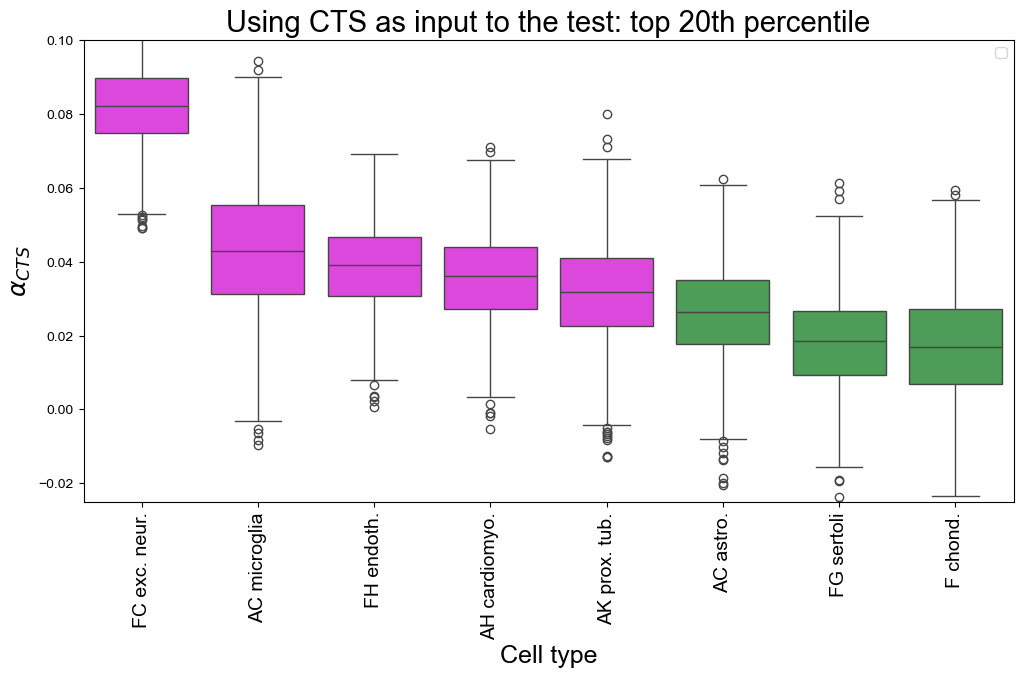

In [54]:
medians = []
ci = []
palette = {}
for ct in np.unique(df["Cell type"]):
    dff = df[(df["Cell type"].isin([ct]))]
    dff = dff.sort_values("alpha")
    ci.append([ct, list(dff["alpha"])[25], list(dff["alpha"])[975]])
    medians.append([ct, np.median(dff["alpha"])])
    
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])

df_ci = pd.DataFrame(ci)
df_ci.columns = ["CellType", "Lower95", "Upper95"]
df_ci = df_ci.sort_values("Lower95", ascending = False)

for index, row in df_ci.iterrows():
    if row["Lower95"] > 0:
        palette[row["CellType"]] = "#F42FF5"
    else:
        palette[row["CellType"]] = "#40A94D"

fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, palette = palette)
plt.ylim(-0.025, 0.1)
plt.ylabel("$\\alpha_{CTS}$", size = 18)
plt.xticks(rotation = 90, size = 14)
plt.xlabel("Cell type", size = 18)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("Using CTS as input to the test: top 20th percentile", size = 21)

df_ci

In [129]:
#Read in the data
v = pd.read_csv("Fixed_LiangSteinNeuron.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_LiangSteinNeuron.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]



C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_20204\2074808829.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [130]:
#Read in the cell type-specificity
v_tau = pd.read_csv("Taus_HumanDerived_Group1_WithNeuron.txt", sep = "\t").sort_values("Tau_abs_logfc").set_index("Position")
vv_tau = pd.read_csv("Taus_Polymorphic_Group1_WithNeuron.txt", sep = "\t").sort_values("Tau_abs_logfc").set_index("Position")


In [131]:
v.index = v["Position"]
v = v.join(v_tau)
vv.index = vv["Position"]
vv = vv.join(vv_tau)


In [132]:
v = v.sort_values("Tau_abs_logfc")
vv = vv.sort_values("Tau_abs_logfc")

In [133]:
from scipy.stats import spearmanr
v2 = v[(v["abs logfc"] > 0.1)]
v2_cts = v2[v2["Tau_abs_logfc"] > 0.9]
v2_ncts = v2[v2["Tau_abs_logfc"] < 0.5]

vv2 = vv[(vv["abs logfc"] > 0.1)]
vv2_cts = vv2[vv2["Tau_abs_logfc"] > 0.9]
vv2_ncts = vv2[vv2["Tau_abs_logfc"] < 0.5]

print(ttest_ind(v2_cts["PhyloP447"], v2_ncts["PhyloP447"]))
print(ttest_ind(vv2_cts["PhyloP447"], vv2_ncts["PhyloP447"]))

TtestResult(statistic=86.66613559993989, pvalue=0.0, df=131856.0)
TtestResult(statistic=39.40923407990553, pvalue=0.0, df=30754.0)


In [53]:
v2_cts_back

,Chrom,Pos1,Pos2
Position,,,
chr14:82838143,chr14,82838143.0,82838144.0
chr7:78998649,chr7,78998649.0,78998650.0
chr13:38518648,chr13,38518648.0,38518649.0
chr14:87739554,chr14,87739554.0,87739555.0
chr13:103283845,chr13,103283845.0,103283846.0
...,...,...,...
chr5:57372920,NaN,NaN,NaN
chr3:98633781,NaN,NaN,NaN
chr2:158487132,NaN,NaN,NaN


In [96]:
F

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr3:159739658,chr3:159739658,chr3:159739658,SCHIP1,100296,2.117,0.153,417,-0.233425,111.935036,95.213430,0.233425,0.362811,0.385732,0.900000,0.597898
chr14:103193690,chr14:103193690,chr14:103193690,TNFAIP2,70230,-0.829,0.000,19,0.212921,56.183014,65.117950,0.212921,0.548799,0.486818,0.900001,0.950157
chr4:132374843,chr4:132374843,chr4:132374843,PCDH10,774449,0.063,0.978,197,0.133388,26.870838,29.473720,0.133388,0.469749,0.463551,0.900001,0.578598
chr6:106728974,chr6:106728974,chr6:106728974,QRSL1,99383,0.029,0.000,186,0.155902,23.678272,26.380394,0.155902,0.752102,0.527334,0.900001,0.828272
chr15:62858001,chr15:62858001,chr15:62858001,TPM1,184747,0.319,0.000,255,0.293163,56.120270,68.765490,0.293163,0.809968,0.803718,0.900002,0.928811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr4:72100602,chr4:72100602,chr4:72100602,NPFFR2,68600,0.177,0.004,174,1.090129,40.324770,85.848630,1.090129,0.510881,0.624832,0.991444,0.938242
chr12:81085519,chr12:81085519,chr12:81085519,ACSS3,7453,0.324,0.000,297,1.593773,107.349630,324.021670,1.593773,0.156483,0.696834,0.992112,0.969354
chr2:98753286,chr2:98753286,chr2:98753286,MGAT4A,22184,-0.446,0.001,169,-1.450011,52.485490,19.210670,1.450011,0.479073,0.524884,0.992793,0.962098


In [93]:
### Create inputs to GREAT to test whether sites with large abs logfc are enriched near certain types of genes

#Change 0.1 to 0.25 for NFIB and other TFs with large effects on CA
v2_cts_fore = v2_cts.copy()

v2_cts_fore["Chrom"] = [x.split(":")[0] for x in v2_cts_fore["Position"]]
v2_cts_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_cts_fore["Position"]]
v2_cts_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_cts_fore["Position"]]
v2_cts_fore = v2_cts_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_cts_fore.to_csv("preGC_CTS_AbsG0.1_Fixed.bed", sep = "\t", header = None, index = None)

#v2_cts["Chrom"] = [x.split(":")[0] for x in v2_cts["Position"]]
#v2_cts["Pos1"] = [int(x.split(":")[1]) for x in v2_cts["Position"]]
#v2_cts["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_cts["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_cts_back = pd.concat([v2_cts, v2_ncts])
v2_cts_back["Chrom"] = [x.split(":")[0] for x in v2_cts_back["Position"]]
v2_cts_back["Pos1"] = [int(x.split(":")[1]) for x in v2_cts_back["Position"]]
v2_cts_back["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_cts_back["Position"]]
v2_cts_back = v2_cts_back[["Chrom", "Pos1", "Pos2"]]
v2_cts_back.to_csv("preGC_NCTS_AbsG0.1_Fixed_Background.bed", sep = "\t", header = None, index = None)

#Not used, making the background polymorphisms (which are much rarer) does not work well
#vv2_cts["Chrom"] = [x.split(":")[0] for x in vv2_cts["Position"]]
#vv2_cts["Pos1"] = [int(x.split(":")[1]) for x in vv2_cts["Position"]]
#vv2_cts["Pos2"] = [int(x.split(":")[1]) + 1 for x in vv2_cts["Position"]]
#v2_cts_back = pd.concat([v2_cts_fore, vv2_cts])
#v2_cts_back = v2_cts_back[["Chrom", "Pos1", "Pos2"]]
#v2_cts_back.to_csv("NR1D1_AbsG0.1_Fixed_Background_Poly_ITL23_FilterNewTEs.bed", sep = "\t", header = None, index = None)

In [66]:
v2_cts

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr14:82838143,chr14:82838143,chr14:82838143,SEL1L,1304303,2.010,0.003,415,-0.103306,445.57568,414.78534,0.103306,0.444092,0.444849,0.900001,0.535045
chr7:78998649,chr7:78998649,chr7:78998649,MAGI2,455016,-0.022,0.000,408,-0.289413,443.44238,362.84015,0.289413,0.657573,0.667987,0.900002,0.855888
chr13:38518648,chr13:38518648,chr13:38518648,FREM2,168414,0.107,0.000,136,0.244569,536.24330,635.30820,0.244569,0.553103,0.539697,0.900002,0.885715
chr14:87739554,chr14:87739554,chr14:87739554,GALC,253599,-0.641,0.000,153,0.205999,276.76880,319.24860,0.205999,0.633287,0.635783,0.900002,0.889356
chr13:103283845,chr13:103283845,chr13:103283845,SLC10A2,217515,0.074,0.000,407,0.124464,562.24560,612.90560,0.124464,0.603087,0.601200,0.900003,0.379865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9:108350884,chr9:108350884,chr9:108350884,ACTL7B,505100,0.731,0.000,423,1.166275,838.27770,1881.35860,1.166275,0.565583,0.740398,0.993216,0.956173
chr14:31895250,chr14:31895250,chr14:31895250,ARHGAP5,181894,1.203,0.288,439,-1.899840,7776.69040,2083.94380,1.899840,0.899002,0.623784,0.993564,0.973703
chr21:36893910,chr21:36893910,chr21:36893910,HLCS,72737,0.094,0.000,352,-1.657733,3535.70870,1120.59620,1.657733,0.799282,0.369162,0.993679,0.961485


In [134]:
v2p = v2[v2["NearestGene"].isin(["VWC2L"])]
v2p.sort_values("Tau_abs_logfc").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr2:213934726,chr2:213934726,chr2:213934726,VWC2L,476397,-0.502,0.000,317,0.537792,598.680400,869.133800,0.537792,0.563051,0.566406,0.864379,0.831344
chr2:214602210,chr2:214602210,chr2:214602210,VWC2L,191087,0.275,0.000,439,0.100066,463.117100,496.379400,0.100066,0.495809,0.482512,0.865520,0.405762
chr2:214462507,chr2:214462507,chr2:214462507,VWC2L,51384,1.444,0.761,170,-0.143745,503.502700,455.753660,0.143745,0.798850,0.803037,0.868044,0.555021
chr2:214472879,chr2:214472879,chr2:214472879,VWC2L,61756,0.037,0.000,239,-0.139248,623.339230,565.987060,0.139248,0.648154,0.612924,0.870596,0.794722
chr2:214379860,chr2:214379860,chr2:214379860,VWC2L,31263,-3.267,0.000,410,-0.141439,683.199460,619.398560,0.141439,0.518048,0.535529,0.877025,0.671384
chr2:214234542,chr2:214234542,chr2:214234542,VWC2L,176581,-0.691,0.397,184,-0.460283,253.224460,184.054570,0.460283,0.553774,0.569336,0.878859,0.968203
chr2:214503910,chr2:214503910,chr2:214503910,VWC2L,92787,-0.213,0.000,386,0.147348,459.828670,509.275000,0.147348,0.398706,0.378810,0.879545,0.812312
chr2:214391578,chr2:214391578,chr2:214391578,VWC2L,19545,-0.721,0.000,337,0.292216,232.093080,284.202500,0.292216,0.380804,0.369134,0.881160,0.771990
chr2:214345303,chr2:214345303,chr2:214345303,VWC2L,65820,1.194,0.000,399,-0.194787,471.576780,412.017670,0.194787,0.531482,0.527864,0.881529,0.744498


In [128]:
v2p.sort_values("Tau_abs_logfc").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr5:44326302,chr5:44326302,chr5:44326302,FGF10,63258,0.855,0.000,298,-0.131499,21.617031,19.733810,0.131499,0.393377,0.404990,0.841378,0.551523
chr5:44103229,chr5:44103229,chr5:44103229,FGF10,286331,-1.051,0.000,240,-0.122566,17.699755,16.258156,0.122566,0.570412,0.577781,0.844686,0.224586
chr5:44542664,chr5:44542664,chr5:44542664,FGF10,153104,0.108,0.083,368,0.283924,49.747513,60.567690,0.283924,0.504049,0.499295,0.844719,0.543839
chr5:44400260,chr5:44400260,chr5:44400260,FGF10,10700,0.446,0.000,409,0.147836,15.714164,17.409820,0.147836,0.405521,0.411834,0.846321,0.859504
chr5:44132885,chr5:44132885,chr5:44132885,FGF10,256675,-0.076,0.000,212,0.329799,34.321426,43.136467,0.329799,0.517569,0.477490,0.847250,0.891105
chr5:44472565,chr5:44472565,chr5:44472565,FGF10,83005,-1.547,0.000,215,0.285457,40.242447,49.047333,0.285457,0.479337,0.457468,0.847746,0.947735
chr5:44228376,chr5:44228376,chr5:44228376,FGF10,161184,1.632,1.000,431,-0.185398,62.219820,54.716515,0.185398,0.478344,0.495251,0.850318,0.769453
chr5:44039540,chr5:44039540,chr5:44039540,FGF10,350020,1.809,0.823,156,0.839268,38.546720,68.965560,0.839268,0.558703,0.532369,0.853478,0.780817
chr5:44530955,chr5:44530955,chr5:44530955,FGF10,141395,0.626,0.002,19,-1.190388,6.429806,2.817444,1.190388,0.632588,0.633356,0.856887,0.482114


0.00038452955042181706


Text(0.5, 1.0, 'CA changes near $\\it{FGF10}$ are more cell type-specific')

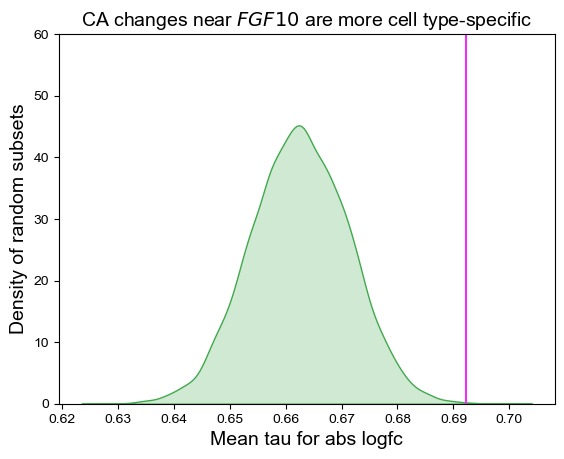

In [126]:
#Top enrichments by great are mostly synaptic/neuron-related for LSN
#Top gene is VWC2L, which has highly specific downregulation in motor neurons

#Second from top gene for preGC is FGF10 which may play a key role in the process: https://pubmed.ncbi.nlm.nih.gov/20876224/
#Maybe more surprisingly, synaptic terms are also enriched for the preGC cells
#Though again cell type-specificity depends on the other cell types, so this makes some sense

#v2p = v2[v2["NearestGene"].isin(["VWC2L"])]
v2p = v2[v2["NearestGene"].isin(["FGF10"])]
#syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
#keep = syngo["hgnc_symbol"]
#v2p = v2[v2["NearestGene"].isin(keep)]
real = np.mean(v2p["Tau_abs_logfc"])
size = v2p.shape[0]

#Only doing 1000 random samples for synaptic genes
fakes = []
for i in range(10000):
    np.random.seed(i)
    fake = np.mean(v2.sample(n = size, replace = False)["Tau_abs_logfc"])
    fakes.append(fake)
print(norm.sf((real - np.mean(fakes))/np.std(fakes)))

sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 60, color = "#F42FF5")
plt.ylim(0, 60)
plt.xlabel("Mean tau for abs logfc", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("CA changes near $\it{FGF10}$ are more cell type-specific", size = 14)

In [115]:
(real - np.mean(fakes))/np.std(fakes)

3.676662811538171

In [77]:
print(norm.sf((real - np.mean(fakes))/np.std(fakes)))


0.0


Text(0.5, 1.0, 'CA changes near VWC2L are more cell type-specific')

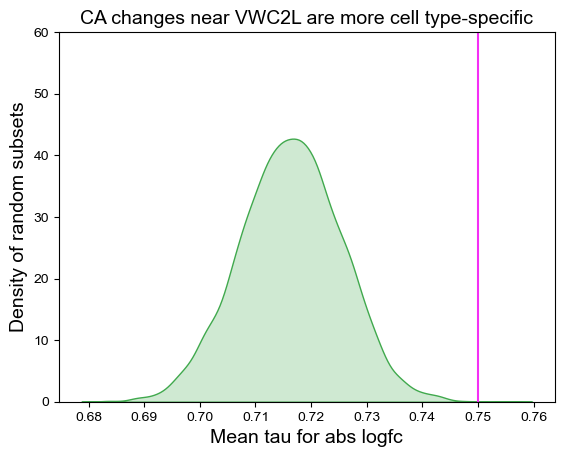

In [116]:
sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 60, color = "#F42FF5")
plt.ylim(0, 60)
plt.xlabel("Mean tau for abs logfc", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("CA changes near VWC2L are more cell type-specific", size = 14)

7.754220911347183e-47


Text(0.5, 1.0, 'CA changes near synaptic genes are more cell type-specific')

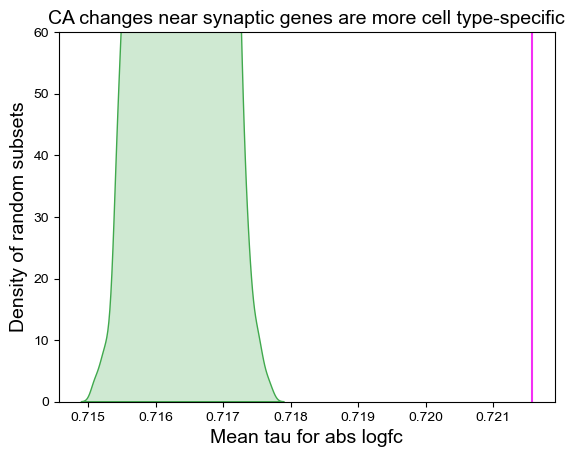

In [117]:
#Top enrichments by great are mostly synaptic/neuron-related for LSN
#Top gene is VWC2L, which has highly specific downregulation in motor neurons

#Second from top gene for preGC is FGF10 which may play a key role in the process: https://pubmed.ncbi.nlm.nih.gov/20876224/
#Maybe more surprisingly, synaptic terms are also enriched for the preGC cells
#Though again cell type-specificity depends on the other cell types, so this makes some sense

#v2p = v2[v2["NearestGene"].isin(["VWC2L"])]
#v2p = v2[v2["NearestGene"].isin(["FGF10"])]
syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
keep = syngo["hgnc_symbol"]
v2p = v2[v2["NearestGene"].isin(keep)]
real = np.mean(v2p["Tau_abs_logfc"])
size = v2p.shape[0]

#Only doing 1000 random samples for synaptic genes
fakes = []
for i in range(10000):
    np.random.seed(i)
    fake = np.mean(v2.sample(n = size, replace = False)["Tau_abs_logfc"])
    fakes.append(fake)
print(norm.sf((real - np.mean(fakes))/np.std(fakes)))

sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 60, color = "#F42FF5")
plt.ylim(0, 60)
plt.xlabel("Mean tau for abs logfc", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("CA changes near synaptic genes are more cell type-specific", size = 14)

Text(0.5, 1.0, 'CA changes near synaptic genes are more cell type-specific')

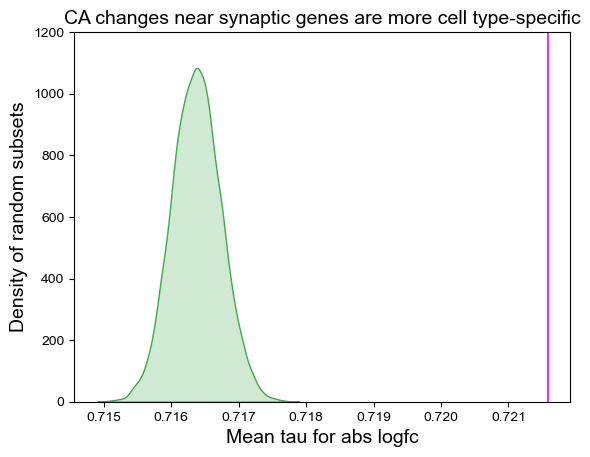

In [119]:
sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 1200, color = "#F42FF5")
plt.ylim(0, 1200)
plt.xlabel("Mean tau for abs logfc", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("CA changes near synaptic genes are more cell type-specific", size = 14)

In [103]:
from scipy.stats import spearmanr
v2 = v[(v["abs logfc"] > 0.1) & (v["SpecSup447"] > 250)]
v2_cts = v2[v2["Tau_abs_logfc"] > 0.9]
v2_ncts = v2[v2["Tau_abs_logfc"] < 0.5]

vv2 = vv[(vv["abs logfc"] > 0.1) & (vv["SpecSup447"] > 250)]
vv2_cts = vv2[vv2["Tau_abs_logfc"] > 0.9]
vv2_ncts = vv2[vv2["Tau_abs_logfc"] < 0.5]

print(ttest_ind(v2_cts["PhyloP447"], v2_ncts["PhyloP447"]))
print(ttest_ind(vv2_cts["PhyloP447"], vv2_ncts["PhyloP447"]))

TtestResult(statistic=25.544912696092172, pvalue=2.5058318728568172e-142, df=28499.0)
TtestResult(statistic=11.55892728116486, pvalue=1.201048090162512e-30, df=7580.0)


In [65]:
v22 = v2_cts[v2_cts["NearestGene"].isin(["VWC2L"])].sort_values("NearestDist")
v22

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr2:214395990,chr2:214395990,chr2:214395990,VWC2L,15133,-0.861,0.000,187,-0.244174,89.721886,75.752090,0.244174,0.612697,0.628493,0.903957,0.596961
chr2:214392880,chr2:214392880,chr2:214392880,VWC2L,18243,-0.102,0.000,233,-0.593431,281.588960,186.627300,0.593431,0.541314,0.553502,0.929401,0.962318
chr2:214392873,chr2:214392873,chr2:214392873,VWC2L,18250,0.214,0.000,228,-0.217042,279.713930,240.645540,0.217042,0.538820,0.553859,0.950219,0.368753
chr2:214432024,chr2:214432024,chr2:214432024,VWC2L,20901,0.714,0.973,414,0.158645,292.439270,326.431900,0.158645,0.388072,0.269497,0.931918,0.889270
chr2:214382399,chr2:214382399,chr2:214382399,VWC2L,28724,0.423,0.047,432,-0.171741,559.467600,496.678960,0.171741,0.404728,0.328843,0.900969,0.795129
chr2:214448958,chr2:214448958,chr2:214448958,VWC2L,37835,0.483,0.000,411,-0.545706,990.703370,678.687500,0.545706,0.609591,0.452433,0.904034,0.925836
chr2:214452107,chr2:214452107,chr2:214452107,VWC2L,40984,0.242,0.000,247,-0.205616,490.703500,425.522460,0.205616,0.476539,0.380106,0.903869,0.917607
chr2:214462438,chr2:214462438,chr2:214462438,VWC2L,51315,-0.022,0.130,155,0.873273,558.782840,1023.586400,0.873273,0.788302,0.768152,0.933308,0.919495
chr2:214358569,chr2:214358569,chr2:214358569,VWC2L,52554,0.929,0.000,402,-0.173693,870.776730,772.004760,0.173693,0.605662,0.556589,0.910046,0.777580


In [110]:
fisher_exact([[48402, 53374], [12754, 14587]])

SignificanceResult(statistic=1.0371775943377282, pvalue=0.007497070939368682)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.035844964778155686,
 0.7921853131842802,
 [0.7921853131842802, 1.1476202319048592, 1.175349197195117],
 'dc > 0.1, likely stable',
 [[48402, 53374], [12754, 14587]],
 <Figure size 1000x600 with 1 Axes>)

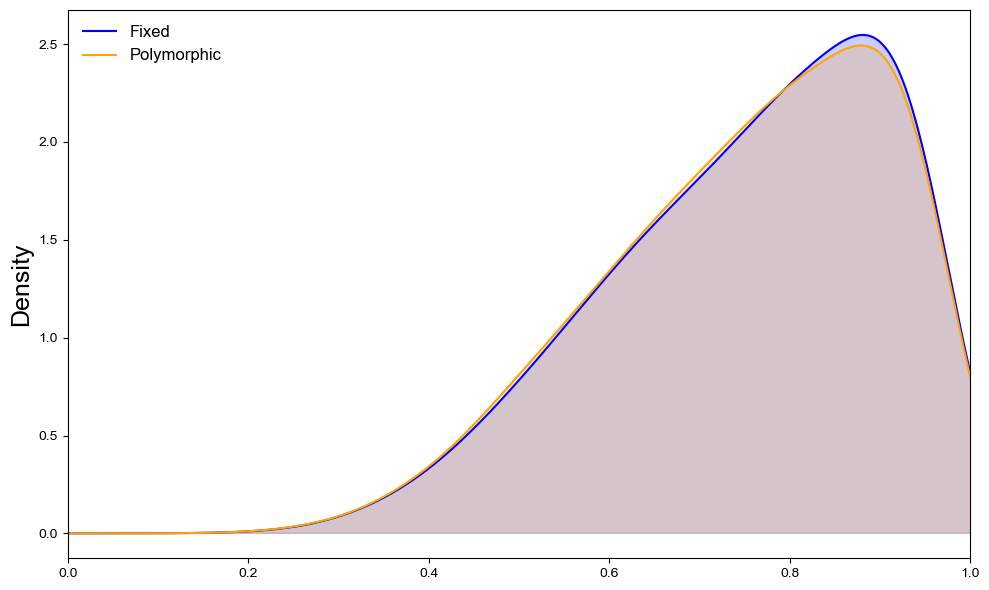

In [109]:
vvv = prepare_alpha(v2, vv2, stat = "Tau_abs_logfc")
compute_alpha_new(vvv, plot = True, window = [0, 1])

In [151]:
v2_cts.sort_values("allele1_pred_counts")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr5:92028528,chr5:92028528,chr5:92028528,ARRDC3,645218,0.250,0.0,324,0.354862,11.581102,14.810646,0.354862,0.618629,0.614234,0.926416,0.934403
chr5:117443574,chr5:117443574,chr5:117443574,SEMA6A,868778,-0.285,0.0,317,0.593701,11.937452,18.014965,0.593701,0.795127,0.781496,0.967759,0.962678
chr14:43705601,chr14:43705601,chr14:43705601,FSCB,801679,-0.268,0.0,262,0.317782,12.831978,15.993937,0.317782,0.684811,0.684424,0.933341,0.890438
chr3:86322219,chr3:86322219,chr3:86322219,VGLL3,668913,0.455,0.0,421,0.255232,13.159413,15.706123,0.255232,0.772234,0.769988,0.909904,0.919767
chr4:176708473,chr4:176708473,chr4:176708473,VEGFC,84423,-0.165,0.0,362,-0.285032,13.508283,11.086561,0.285032,0.504450,0.512849,0.913172,0.934270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr7:6730424,chr7:6730424,chr7:6730424,RSPH10B2,23684,1.895,0.0,364,-0.916006,3275.719700,1736.047400,0.916006,0.780512,0.578527,0.969679,0.956789
chr14:39266918,chr14:39266918,chr14:39266918,CTAGE5,0,-0.377,0.0,364,0.270056,3322.596700,4006.569300,0.270056,0.432452,0.416818,0.914701,0.816669
chr5:155729113,chr5:155729113,chr5:155729113,SGCD,598051,-0.648,0.0,427,0.529201,3732.475000,5386.446000,0.529201,0.557342,0.695622,0.952684,0.956523


In [105]:
#Here is the logic behind this
#If it were due to less efficient purifying selection, it would have to be because a non cell type specific change,
#with all else equal, would be more deleterious/impactful than a cell type specific one
#If this is the case, then we would expect that
#the polymorphic high_vv_ncts (i.e. large effect non-cell type specific changes) would be the most affected by this
#therefore, the ratio of large effect non-cell type specific changes to large effect cell type specific changes
#would be higher for polymorphism than for fixed
#At PhyloP of 1 we see significant, at phylop of 5 we see even higher OR but same significance
#Higher OR when using a more extreme abs logfc cutoff (though not as low of p-value due to lower sample size)
#This is strongly true for preGC_IIA and LiangSteinNeuron at least
#Nearly as strongly true for Microglia with PhyloP, suggests it is a somewhat general idea.  Weaker for abs logfc but still sig at 0.1.
#Much more weakly true for cardiomyocytes, and chondrocytes
#Weakly true for heart endothelial cells
#Somewhat strongly true for Sertoli cells

high_v_cts = v2_cts[v2_cts["PhyloP447"] > 1].shape[0]
high_v_ncts = v2_ncts[v2_ncts["PhyloP447"] > 1].shape[0]

high_vv_cts = vv2_cts[vv2_cts["PhyloP447"] > 1].shape[0]
high_vv_ncts = vv2_ncts[vv2_ncts["PhyloP447"] > 1].shape[0]

fisher_exact([[high_v_cts, high_v_ncts], [high_vv_cts, high_vv_ncts]])

SignificanceResult(statistic=1.2120441710171366, pvalue=0.012313380078788913)

In [102]:
high_v_cts = v2_cts[v2_cts["abs logfc"] > 0.5].shape[0]
high_v_ncts = v2_ncts[v2_ncts["abs logfc"] > 0.5].shape[0]

high_vv_cts = vv2_cts[vv2_cts["abs logfc"] > 0.5].shape[0]
high_vv_ncts = vv2_ncts[vv2_ncts["abs logfc"] > 0.5].shape[0]

fisher_exact([[high_v_cts, high_v_ncts], [high_vv_cts, high_vv_ncts]])

SignificanceResult(statistic=1.0958924129287848, pvalue=0.10933619191904245)

In [31]:
[[high_v_cts, high_v_ncts], [high_vv_cts, high_vv_ncts]]

[[23130, 12771], [5567, 3652]]

In [39]:
v2_cts.sort_values("allele1_pred_counts").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
Position,,,,,,,,,,,,,,,
chr1:230977971,chr1:230977971,chr1:230977971,TTC13,0,-1.299,0.000,436,0.117795,1040.5240,1129.04710,0.117795,0.532299,0.544993,0.912018,0.855092
chr19:38503075,chr19:38503075,chr19:38503075,RYR1,69396,0.172,0.000,395,0.403319,1049.7242,1388.30980,0.403319,0.805269,0.852858,0.913758,0.720498
chr21:25727493,chr21:25727493,chr21:25727493,ATP5J,7766,0.782,0.000,329,-0.317709,1051.8607,843.95337,0.317709,0.944683,0.931871,0.928826,0.672652
chr11:8080633,chr11:8080633,chr11:8080633,TUB,41849,0.619,0.000,432,-0.257723,1051.9727,879.87756,0.257723,0.614274,0.542670,0.929556,0.778486
chr11:2652419,chr11:2652419,chr11:2652419,KCNQ1,207431,8.177,1.000,439,0.398980,1054.2533,1390.11250,0.398980,0.848506,0.884194,0.958596,0.786070
chr22:25052020,chr22:25052020,chr22:25052020,KIAA1671,23929,0.567,0.000,405,-0.401787,1067.3807,807.92194,0.401787,0.879010,0.839969,0.953903,0.602637
chr4:1209582,chr4:1209582,chr4:1209582,SPON2,36888,-3.285,0.000,278,0.319815,1071.1616,1336.99270,0.319815,0.570414,0.656057,0.957494,0.709496
chr21:24904105,chr21:24904105,chr21:24904105,MRPL39,703387,1.357,0.000,404,-0.292749,1081.8057,883.12695,0.292749,0.878609,0.886319,0.900136,0.845380
chr3:22858754,chr3:22858754,chr3:22858754,UBE2E2,344388,0.473,0.000,286,0.154775,1083.8026,1206.54130,0.154775,0.921920,0.930019,0.914520,0.479183
